(sor-method-section)=
# The Successive Over Relaxation (SOR) method

The **Successive Over Relaxation (SOR)** method improves on the convergence rate of the [Gauss-Seidel](gauss-seidel-method-definition) method by applying a weighting factor to the updated estimates to adjust the extent of the change. Let $\omega$ be a **relaxation parameter** in the range $[0,2]$ then the SOR method is

````{admonition} Definition: The Successive Over Relaxation (SOR) method
:class: note
:name: sor-method-definition

The SOR method for solving a system of linear equations of the form $A \mathbf{x} = \mathbf{b}$ is

```{math}
:label: sor-method-equation

x_i^{(k+1)} =(1 - \omega) x_i^{(k)} + \frac{\omega}{a_{ii} }\left(b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} -\sum_{j=i+1}^n a_{ij} x_j^{(k)} \right), \qquad i = 1, \ldots, n.
```

where $\omega \in [0, 2]$.
````

The iteration matrix for the SOR method is derived by writing the coefficient matrix of the linear system $A\mathbf{x}=\mathbf{b}$ using

\begin{align*}
    A = L+\left(1-\frac{1}{\omega }\right)D+\frac{1}{\omega }D+U.
\end{align*}

Substituting into the linear system $A \mathbf{x} = \mathbf{b}$ and rearranging

\begin{align*}
    \left(L+\left(1-\frac{1}{\omega }\right)D+\frac{1}{\omega }D+U\right)\mathbf{x}&=\mathbf{b}\\
    (D+\omega L)\mathbf{x}+((\omega -1)D+\omega U)\mathbf{x}&=\omega \mathbf{b}\\
    (D+\omega L)\mathbf{x}&=((1-\omega )D-\omega U)\mathbf{x}+\omega \mathbf{b}\\
    \mathbf{x}&=(D+\omega L)^{-1} ((1-\omega )D-\omega U)\mathbf{x}+(D+\omega L)^{-1} \omega \mathbf{b}.
\end{align*}

So the matrix form of the SOR method is

\begin{align*}
    \mathbf{x}^{(k+1)} =(D+\omega L)^{-1} ((1-\omega )D-\omega U)\mathbf{x}^{(k)} +(D+\omega L)^{-1} \omega \mathbf{b}
\end{align*}

and the iteration matrix is

````{admonition} Definition: Iteration matrix for the SOR method
:class: note
:name: sor-method-iteration-matrix-definition

```{math}
:label: sor-method-iteration-matrix-equation

T_{SOR} =(D+\omega L)^{-1} ((1-\omega )D-\omega U).
```
````

The value of $\omega$ affects the rate of convergence of the SOR method and is determined by how the Gauss-Seidel method converges to the exact solution. Consider the diagrams in {numref}`over-relaxation-figure` and {numref}`under-relaxation-figure` below that shows the two types of convergence of the Gauss-Seidel method. When we have [monotonic](https://en.wikipedia.org/wiki/Monotonic_function) convergence where each successive iteration approaches the exact solution from a single side ({numref}`over-relaxation-figure`), the rate of convergence is improved by using $\omega > 1$ so that the change in subsequent approximations is increased. When we have oscillatory convergence where successive iterations overshoot the exact solution ({numref}`under-relaxation-figure`) the rate of convergence is improved by using $\omega < 1$ so that the change in the subsequent approximation is decreased.

```{figure} ../Images/sor_1.png
:name: over-relaxation-figure

The estimated solution approaches the exact solution monotonically.
```

```{figure} ../Images/sor_2.png
:name: under-relaxation-figure

The estimated solution oscillates about the exact solution.
```

(optimum-relaxation-parameter-section)=
## Optimum value of the relaxation parameter

The optimum value of $\omega$ will be the one that minimises the spectral radius of the iteration matrix. The [iteration matrix](sor-method-iteration-matrix-definition) will depend on the value of $\omega$. One way to estimate the optimum value of $\omega$ is to calculate $\rho(T_{SOR})$ for values in the range $\omega \in [0, 2]$ and choose the value of $\omega$ which minimises this value. This has been done for the system of linear equations from [example 7.1](jacobi-method-example) and the plot is shown in {numref}`optimum-relaxation-parameter-figure`.

```{glue:figure} optimum_omega_plot
:name: optimum-relaxation-parameter-figure

Plot of the spectral radius $\rho(T_{SOR})$ of the iteration matrix for the SOR method when used to solve the system of linear equations from [example 7.1](jacobi-method-example).
```

So an estimation of the optimum value of the relaxation parameters is $\omega = 1.25$. 

If the coefficient matrix $A$ has real eigenvalues we can use the following theorem to calculate the exact value of $\omega$. 

````{admonition} Theorem: Optimum relaxation parameter
:class: important
:name: optimum-relaxation-parameter-theorem

If a system of linear equations of the form $A\mathbf{x}=\mathbf{b}$ has a coefficient matrix $A$ with all real eigenvalues then the optimum relaxation parameter for the SOR method can be calculated using

```{math}
:label: optimum-relaxation-parameter-equation

\omega_{opt} = 1+{\left(\frac{\rho (T_J )}{1+\sqrt{1-\rho (T_J )^2 }}\right)}^2,
```
where $\rho(T_J)$ is the spectral radius of the iteration matrix of the [Jacobi method](jacobi-method-iteration-matrix-definition).
````

`````{admonition} Example 7.4
:class: seealso
:name: optimum-relaxation-parameter-example

Determine the optimum relaxation parameter for the SOR method when applied to the system of linear equations from [example 7.1](jacobi-method-example) by calculating $\rho(T_{SOR})$ for a range of $\omega$ values and using equation {eq}`optimum-relaxation-parameter-equation` (if possible).

````{dropdown} Solution

The coefficient matrix is
\begin{align*}
    A = \begin{pmatrix}
        4 & 3 & 0 \\ 
        3 & 4 & -1 \\
        0 & -1 & 4
    \end{pmatrix}.
\end{align*}

The plot below shows the value of $\rho(T_{SOR})$ for a range of $\omega$ values. The minimum value of $\rho(T_{SOR})$ corresponds to $\omega = 1.2405$. 

```{glue:} optimum_omega_plot
```

The eigenvalues of $A$ are  

\begin{align*}
    0 &= \begin{vmatrix}
        4 - \lambda & 3 & 0 \\
        3 & 4 - \lambda & -1 \\
        0 & -1 & 4 - \lambda
    \end{vmatrix}
    = (4 - \lambda)(\lambda^2 - 7\lambda + 6), \\
    \therefore \lambda &= 4, 4 \pm \sqrt{10},
\end{align*} 

so $A$ has real eigenvalues. The iteration matrix for the Jacobi method applied to this system is

\begin{align*}
    T_J &= -D^{-1}(L + U)
    = - \begin{pmatrix}
        \frac{1}{4} & 0 & 0 \\ 
        0 & \frac{1}{4} & 0 \\
        0 & 0 & \frac{1}{4}
    \end{pmatrix}
    \begin{pmatrix}
        0 & 3 & 0 \\
        3 & 0 & -1 \\
        0 & -1 & 0 
    \end{pmatrix} \\
    &= \begin{pmatrix}
        0 & -\frac{3}{4} & 0 \\
        -\frac{3}{4} & 0 & \frac{1}{4} \\
        0 & \frac{1}{4} & 0
    \end{pmatrix}.
\end{align*}

Calculating $\rho(T_J)$

\begin{align*}
    0 &= \begin{vmatrix}
        -\lambda & -\frac{3}{4} & 0 \\
        -\frac{3}{4} & -\lambda & \frac{1}{4} \\
        0 & \frac{1}{4} & -\lambda
    \end{vmatrix} =
    -\lambda \left( \lambda^2 + \frac{5}{8} \right), \\
    \therefore \lambda &= 0, \pm \frac{\sqrt{10}}{4}
\end{align*}

so $\rho(T_J) = \frac{\sqrt{10}}{4}$. Using equation {eq}`optimum-relaxation-parameter-equation`

\begin{align*}
    \omega = 1 + \left( \frac{\frac{\sqrt{10}}{4}}{1 + \sqrt{1 - (\frac{\sqrt{10}}{4})^2}} \right)^2 = \frac{4}{5}(4 - \sqrt{6}) \approx 1.2404.
\end{align*}

````
`````

````{admonition} Example 7.5
:class: seealso
:name: sor-method-example

Use the SOR method with $\omega = 1.24$ to solve the system of linear equations from [example 7.1](jacobi-method-example)

\begin{align*}
    4x_1 +3x_2 &=-2,\\
    3x_1 +4x_2 -x_3 &=-8,\\
    -x_2 +4x_3 &=14.
\end{align*}

```{dropdown} Solution

The SOR method for this system is

\begin{align*}
    x_{1}^{(k+1)} &= (1 - \omega)x_{1}^{(k)} + \frac{\omega}{4} \left( -2 - 3 x_{2}^{(k)} \right), \\
    x_{2}^{(k+1)} &= (1 - \omega)x_{2}^{(k)} + \frac{\omega}{4} \left( -8 - 3 x_{1}^{(k+1)} + x_{3}^{(k)} \right), \\
    x_{3}^{(k+1)} &= (1 - \omega)x_{3}^{(k)} + \frac{\omega}{4} \left( 14 + x_{2}^{(k+1)} \right).
\end{align*}

Using starting values of $\mathbf{x} = \mathbf{0}$. Calculating the first iteration

\begin{align*}
    x_{1}^{(1)} &= (1 - 1.24)(-0.5) \frac{1.24}{4} \left( -2 - 3 (-1.625) \right) = -0.5, \\
    x_{2}^{(1)} &= (1 - 1.24)(-1.625) \frac{1.24}{4} \left( -8 - 3 (-0.5) + -3.09375 \right) = -1.625, \\
    x_{3}^{(1)} &= (1 - 1.24)(3.09375) \frac{1.24}{4} \left( 14 + 1.625 \right) = 3.09375.
\end{align*}

Calculate the residual

\begin{align*}
    \mathbf{r}^{(1)} &= \mathbf{b} - A \mathbf{x}^{(1)} = 
    \begin{pmatrix} -2 \\ -8 \\ 14 \end{pmatrix} -
    \begin{pmatrix} 4 & 3 & 0 \\ 3 & 4 & -1 \\ 0 & -1 & 4 \end{pmatrix}
    \begin{pmatrix} -0.5 \\ -1.625 \\ 3.09375 \end{pmatrix} \\
    &=
    \begin{pmatrix} 4.875 \\ 3.09375 \\ 0.0 \end{pmatrix}.
\end{align*}

Since $\max(| \mathbf{r}^{(1)} |) = 4.875 > 10^{-4}$ we continue iterating. Calculating the second iteration

\begin{align*}
    x_{1}^{(2)} &= (1 - 1.24)(0.71875) \frac{1.24}{4} \left( -2 - 3 (-1.765625) \right) = 0.71875, \\
    x_{2}^{(2)} &= (1 - 1.24)(-1.765625) \frac{1.24}{4} \left( -8 - 3 (0.71875) + -3.05859375 \right) \\
    &= -1.765625, \\
    x_{3}^{(2)} &= (1 - 1.24)(3.05859375) \frac{1.24}{4} \left( 14 + 1.765625 \right) = 3.05859375.
\end{align*}

Calculate the residual

\begin{align*}
    \mathbf{r}^{(2)} &= \mathbf{b} - A \mathbf{x}^{(1)} = 
    \begin{pmatrix} -2 \\ -8 \\ 14 \end{pmatrix} -
    \begin{pmatrix} 4 & 3 & 0 \\ 3 & 4 & -1 \\ 0 & -1 & 4 \end{pmatrix}
    \begin{pmatrix} 0.71875 \\ -1.765625 \\ 3.05859375 \end{pmatrix} \\
    &=
    \begin{pmatrix} 0.421875 \\ -0.03515625 \\ 0.0 \end{pmatrix}.
\end{align*}

Since $\max(| \mathbf{r}^{(2)} |) = 0.421875 > 10^{-4}$ we continue iterating. The SOR method was iterated until $|\mathbf{r}| < 10^{-4}$ and the iteration values are given in the table below. Note that the SOR method took 9 iterations to achieve convergence to $tol=10^{-4}$ whereas the [Jacobi method](jacobi-method-example) took 49 iterations and the [Gauss-Seidel method](gauss-seidel-method-example) took 19 iterations to achieve the same accuracy.

| $k$ |  $x_{0}$  |  $x_{1}$  |  $x_{2}$  | $\max(\mathbf{r})$ |
|:---:|:---------:|:---------:|:---------:|:---------:|
|   0 |  0.000000 |  0.000000 |  0.000000 | 14.000000 |
|   1 | -0.620000 | -1.903400 |  3.749946 |  6.190200 |
|   2 |  1.298962 | -2.068735 |  2.798705 |  0.989642 |
|   3 |  0.992173 | -2.038626 |  3.036337 |  0.214321 |
|   4 |  1.037801 | -2.014620 |  2.986747 |  0.107343 |
|   5 |  1.004524 | -2.004807 |  3.001690 |  0.011569 |
|   6 |  1.003385 | -2.001470 |  2.999139 |  0.009129 |
|   7 |  1.000555 | -2.000430 |  3.000073 |  0.000929 |
|   8 |  1.000267 | -2.000122 |  2.999944 |  0.000701 |
|   9 |  1.000050 | -2.000034 |  3.000003 |  0.000096 |

```
````

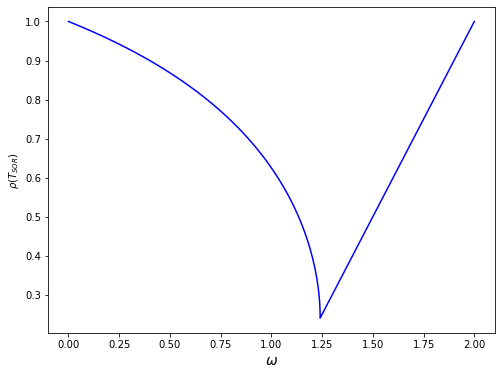

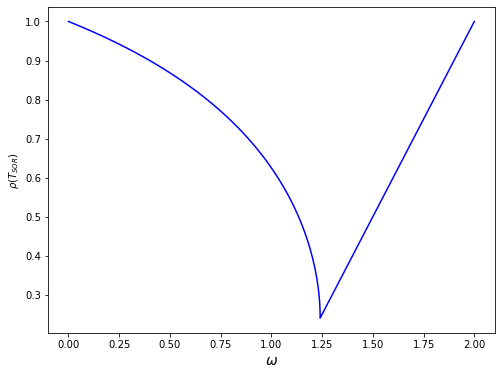

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sor_iteration_matrix(A, omega):
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    D = A - L - U
    return np.dot(np.linalg.inv(D + omega * L), ((1 - omega) * D - omega * U))


# Define coefficient matrix
A = np.array([[4, 3, 0], [3, 4, -1], [0, -1, 4]])

# Loop through values of omega and calculate the spectral radius of the iteration matrix
omega = np.arange(0, 2 + 1e-4, 1e-4)
rho = np.zeros(omega.shape)
for i in range(len(omega)):
    T_SOR = sor_iteration_matrix(A, omega[i])
    rho[i] = max(abs(np.linalg.eigvals(T_SOR)))
    
# Plot spectral radii
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(omega, rho, "b")
plt.xlabel("$\omega$", fontsize=14)
plt.ylabel(r"$\rho(T_{SOR})$")
plt.show()

from myst_nb import glue
glue("optimum_omega_plot", fig, display=False)

In [2]:
import numpy as np

def sor_latex(A, b, omega, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    maxiter = 100
    ordinal = ["first", "second", "third"]
    print("The SOR method for this system is")
    print()
    print(r"\begin{align*}")
    for i in range(n):
        string = rf"    x_{{{i+1}}}^{{(k+1)}} &= (1 - \omega)x_{{{i+1}}}^{{(k)}} + \frac{{\omega}}{{{A[i,i]}}} \left( {b[i]}"
        for j in range(n):
            if i == j:
                continue
            if A[i,j] == 1:
                string += rf" - x_{{{j+1}}}"
            elif A[i,j] == -1:
                string += rf" + x_{{{j+1}}}"
            elif A[i,j] < 0:
                string += rf" + {-A[i,j]} x_{{{j+1}}}"
            elif A[i,j] > 0:
                string += rf" - {A[i,j]} x_{{{j+1}}}"
            if j < i and A[i,j] != 0:
                string += rf"^{{(k+1)}}"
            elif j > i and A[i,j] != 0:
                string += rf"^{{(k)}}"
        
        if i == n - 1:
            string += r" \right)."
        else:
            string += r" \right), \\"
            
        print(string)
    print(r"\end{align*}")
    print()
    print("Using starting values of $\mathbf{x} = \mathbf{0}$. ", end="")
        
    for k in range(2):
        for i in range(n):
            s = b[i]
            for j in range(n):
                if i != j:
                    s -= A[i,j] * x[j]

            x[i] = s / A[i,i]
            r = b - np.dot(A, x)
        
        print(rf"Calculating the {ordinal[k]} iteration")
        print()
        print(r"\begin{align*}")
        for i in range(n):
            string = rf"    x_{{{i+1}}}^{{({k+1})}} &= (1 - {omega})({x[i]}) \frac{{{omega}}}{{{A[i,i]}}} \left( {b[i]}"
            for j in range(n):
                if i == j:
                    continue
                if A[i,j] == 1:
                    string += rf" - {x[j]}"
                elif A[i,j] == -1:
                    string += rf" + {-x[j]}"
                elif A[i,j] < 0:
                    string += rf" + {-A[i,j]} ({x[j]})"
                elif A[i,j] > 0:
                    string += rf" - {A[i,j]} ({x[j]})"

            if i == n - 1:
                string += rf" \right) = {x[i]}."
            else:
                string += rf" \right) = {x[i]}, \\"

            print(string)
        
        print(r"\end{align*}")
        print()
        print("Calculate the residual")
        print()
        print(r"\begin{align*}")
        print(rf"    \mathbf{{r}}^{{({k+1})}} = \mathbf{{b}} - A \mathbf{{x}}^{{(1)}} = ")
        string = r"    \begin{pmatrix}"
        for i in range(n):
            string += rf" {b[i]}"
            if i < n - 1:
                string += r" \\"
        string += r" \end{pmatrix} -"
        print(string)

        string = r"    \begin{pmatrix}"
        for i in range(n):
            for j in range(n):
                string += rf" {A[i,j]}"
                if j < n - 1:
                    string += r" &"
            if i < n - 1:
                string += r" \\"
        string += r" \end{pmatrix}"
        print(string)

        string = r"    \begin{pmatrix}"
        for i in range(n):
            string += rf" {x[i]}"
            if i < n - 1:
                string += r" \\"
        string += r" \end{pmatrix} ="
        print(string)

        string = r"    \begin{pmatrix}"
        for i in range(n):
            string += rf" {r[i]}"
            if i < n - 1:
                string += r" \\"
        string += r" \end{pmatrix}."
        print(string)
        print(r"\end{align*}")
        print()
        print(rf"Since $\max(| \mathbf{{r}}^{{({k+1})}} |) = {max(abs(r))} > 10^{{-4}}$ we continue iterating. ", end="")
        
# Define linear system
A = np.array([[4, 3, 0], [3, 4, -1], [0, -1, 4]])
b = np.array([-2, -8, 14])

# Solve linear system
omega = 1.24
sor_latex(A, b, omega)

The SOR method for this system is

\begin{align*}
    x_{1}^{(k+1)} &= (1 - \omega)x_{1}^{(k)} + \frac{\omega}{4} \left( -2 - 3 x_{2}^{(k)} \right), \\
    x_{2}^{(k+1)} &= (1 - \omega)x_{2}^{(k)} + \frac{\omega}{4} \left( -8 - 3 x_{1}^{(k+1)} + x_{3}^{(k)} \right), \\
    x_{3}^{(k+1)} &= (1 - \omega)x_{3}^{(k)} + \frac{\omega}{4} \left( 14 + x_{2}^{(k+1)} \right).
\end{align*}

Using starting values of $\mathbf{x} = \mathbf{0}$. Calculating the first iteration

\begin{align*}
    x_{1}^{(1)} &= (1 - 1.24)(-0.5) \frac{1.24}{4} \left( -2 - 3 (-1.625) \right) = -0.5, \\
    x_{2}^{(1)} &= (1 - 1.24)(-1.625) \frac{1.24}{4} \left( -8 - 3 (-0.5) + -3.09375 \right) = -1.625, \\
    x_{3}^{(1)} &= (1 - 1.24)(3.09375) \frac{1.24}{4} \left( 14 + 1.625 \right) = 3.09375.
\end{align*}

Calculate the residual

\begin{align*}
    \mathbf{r}^{(1)} = \mathbf{b} - A \mathbf{x}^{(1)} = 
    \begin{pmatrix} -2 \\ -8 \\ 14 \end{pmatrix} -
    \begin{pmatrix} 4 & 3 & 0 \\ 3 & 4 & -1 \\ 0 & -1 & 4 \end{pm

In [3]:
import numpy as np

def sor_with_table(A, b, omega, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    maxiter = 100
    r = b - np.dot(A, x)
    headings = f"| $k$ |"
    line = "|:---:|"
    for i in range(n):
        headings += f"  $x_{{{i}}}$  |"
        line += ":---------:|"
    headings += r" $\max(\mathbf{r})$ |"
    line += ":---------:|"
    print(headings)
    print(line)
    string = f"| {0:3d} |"
    for i in range(n):
        string += f" {x[i]:9.6f} |"
    string += f" {max(abs(r)):9.6f} |"
    print(string)
        
    for k in range(maxiter):
        for i in range(n):
            s = b[i]
            for j in range(n):
                if i != j:
                    s -= A[i,j] * x[j]
        
            x[i] = (1 - omega) * x[i] + omega * s / A[i,i]
            
        r = b - np.dot(A, x)
        
        string = f"| {k+1:3d} |"
        for i in range(n):
            string += f" {x[i]:9.6f} |"
        string += f" {max(abs(r)):9.6f} |"
        print(string)
            
        if max(abs(r)) < tol:
            break
    
    return x


 # Define linear system
A = np.array([[4, 3, 0], [3, 4, -1], [0, -1, 4]])
b = np.array([-2, -8, 14])

# Solve linear system
omega = 1.24
x = sor_with_table(A, b, omega, tol=1e-4)

| $k$ |  $x_{0}$  |  $x_{1}$  |  $x_{2}$  | $\max(\mathbf{r})$ |
|:---:|:---------:|:---------:|:---------:|:---------:|
|   0 |  0.000000 |  0.000000 |  0.000000 | 14.000000 |
|   1 | -0.620000 | -1.903400 |  3.749946 |  6.190200 |
|   2 |  1.298962 | -2.068735 |  2.798705 |  0.989642 |
|   3 |  0.992173 | -2.038626 |  3.036337 |  0.214321 |
|   4 |  1.037801 | -2.014620 |  2.986747 |  0.107343 |
|   5 |  1.004524 | -2.004807 |  3.001690 |  0.011569 |
|   6 |  1.003385 | -2.001470 |  2.999139 |  0.009129 |
|   7 |  1.000555 | -2.000430 |  3.000073 |  0.000929 |
|   8 |  1.000267 | -2.000122 |  2.999944 |  0.000701 |
|   9 |  1.000050 | -2.000034 |  3.000003 |  0.000096 |


## Python code

The code below defines a function called `sor()` which solves a linear system of equations of the for $A \mathbf{x} = \mathbf{b}$ using the Gauss-Seidel method with a relaxation parameter $\omega$.

In [4]:
def sor(A, b, omega, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    maxiter = 100
    for k in range(maxiter):
        for i in range(n):
            mysum = b[i]
            for j in range(n):
                if i != j:
                    mysum -= A[i,j] * x[j]
        
            x[i] = (1 - omega) * x[i] + omega / A[i,i] * mysum
            
        r = b - np.dot(A, x)   
        if max(abs(r)) < tol:
            break
    
    return x